In [24]:
import pandas as pd
data = pd.read_csv("C:/Users/docum/Downloads/portfolio_data.csv")
data.head()

,Date,AMZN,DPZ,BTC,NFLX
0,5/13/2013,264.510010,54.573097,111.400002,32.768570
1,5/14/2013,268.329987,55.275757,114.220001,33.424286
2,5/15/2013,266.559998,54.001606,118.209999,34.771427
3,5/16/2013,264.119995,53.364532,123.500000,33.861427
4,5/17/2013,269.899994,53.936020,123.209999,34.142857


In [25]:
data.tail()

,Date,AMZN,DPZ,BTC,NFLX
1507,05-08-2019,1917.770020,283.149994,6171.959961,364.369995
1508,05-09-2019,1899.869995,282.160004,6358.290039,362.750000
1509,05-10-2019,1889.979980,278.369995,7191.359863,361.040009
1510,5/13/2019,1822.680054,273.880005,7980.129883,345.260010
1511,5/14/2019,1840.119995,272.859985,8183.830078,345.609985


In [26]:
data

,Date,AMZN,DPZ,BTC,NFLX
0,5/13/2013,264.510010,54.573097,111.400002,32.768570
1,5/14/2013,268.329987,55.275757,114.220001,33.424286
2,5/15/2013,266.559998,54.001606,118.209999,34.771427
3,5/16/2013,264.119995,53.364532,123.500000,33.861427
4,5/17/2013,269.899994,53.936020,123.209999,34.142857
...,...,...,...,...,...
1507,05-08-2019,1917.770020,283.149994,6171.959961,364.369995
1508,05-09-2019,1899.869995,282.160004,6358.290039,362.750000
1509,05-10-2019,1889.979980,278.369995,7191.359863,361.040009
1510,5/13/2019,1822.680054,273.880005,7980.129883,345.260010


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [28]:
data = data[['AMZN']]
dataset = data.values
dataset = dataset.astype('float32')

In [29]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [30]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

In [31]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape the input data for LSTM (batch_size, time_steps, features)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build the LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Inverse transform the predictions to original scale
trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)


Epoch 1/50
1012/1012 - 3s - loss: 0.0099 - 3s/epoch - 3ms/step
Epoch 2/50
1012/1012 - 1s - loss: 3.9480e-04 - 1s/epoch - 1ms/step
Epoch 3/50
1012/1012 - 1s - loss: 3.1094e-05 - 1s/epoch - 1ms/step
Epoch 4/50
1012/1012 - 1s - loss: 3.1366e-05 - 1s/epoch - 1ms/step
Epoch 5/50
1012/1012 - 1s - loss: 3.2492e-05 - 1s/epoch - 1ms/step
Epoch 6/50
1012/1012 - 1s - loss: 3.2155e-05 - 1s/epoch - 1ms/step
Epoch 7/50
1012/1012 - 1s - loss: 3.2939e-05 - 1s/epoch - 1ms/step
Epoch 8/50
1012/1012 - 1s - loss: 3.2202e-05 - 1s/epoch - 1ms/step
Epoch 9/50
1012/1012 - 1s - loss: 3.3027e-05 - 1s/epoch - 1ms/step
Epoch 10/50
1012/1012 - 1s - loss: 3.2536e-05 - 1s/epoch - 1ms/step
Epoch 11/50
1012/1012 - 1s - loss: 3.3646e-05 - 1s/epoch - 1ms/step
Epoch 12/50
1012/1012 - 1s - loss: 3.2497e-05 - 1s/epoch - 1ms/step
Epoch 13/50
1012/1012 - 1s - loss: 3.2194e-05 - 1s/epoch - 1ms/step
Epoch 14/50
1012/1012 - 2s - loss: 3.4677e-05 - 2s/epoch - 2ms/step
Epoch 15/50
1012/1012 - 2s - loss: 3.5052e-05 - 2s/epoch - 2m

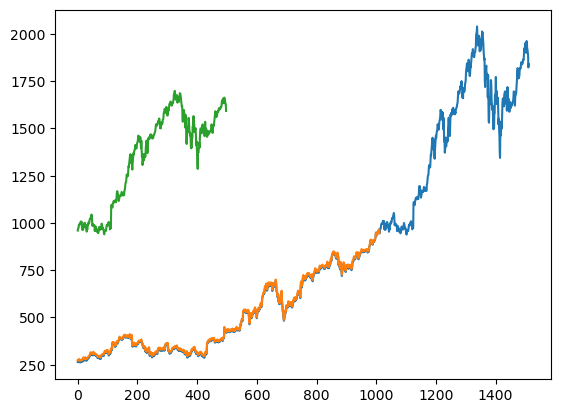

In [32]:
# Plot the original data and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredict)
plt.plot(testPredict)
plt.show()